In [2]:
%load_ext autoreload
%autoreload 2

Processing sequence:   0%|          | 0/5 [00:00<?, ?img/s]

>> Loading a list of 2 images
 - adding /home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/test/night/ImagesIR/fl_ir_aligned_1570730891_191987444_ir.png with resolution 1920x650 --> 224x224
 - adding /home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/test/night/ImagesIR/fl_ir_aligned_1570730891_191987444_ir.png with resolution 1920x650 --> 224x224
 (Found 2 images)
>> Inference with model on 2 image pairs


100%|██████████| 2/2 [00:03<00:00,  1.70s/it]
/tmp/ipykernel_682263/1502345967.py:39: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  depth_pred = np.array(pred1['pts3d'][0][..., 2])


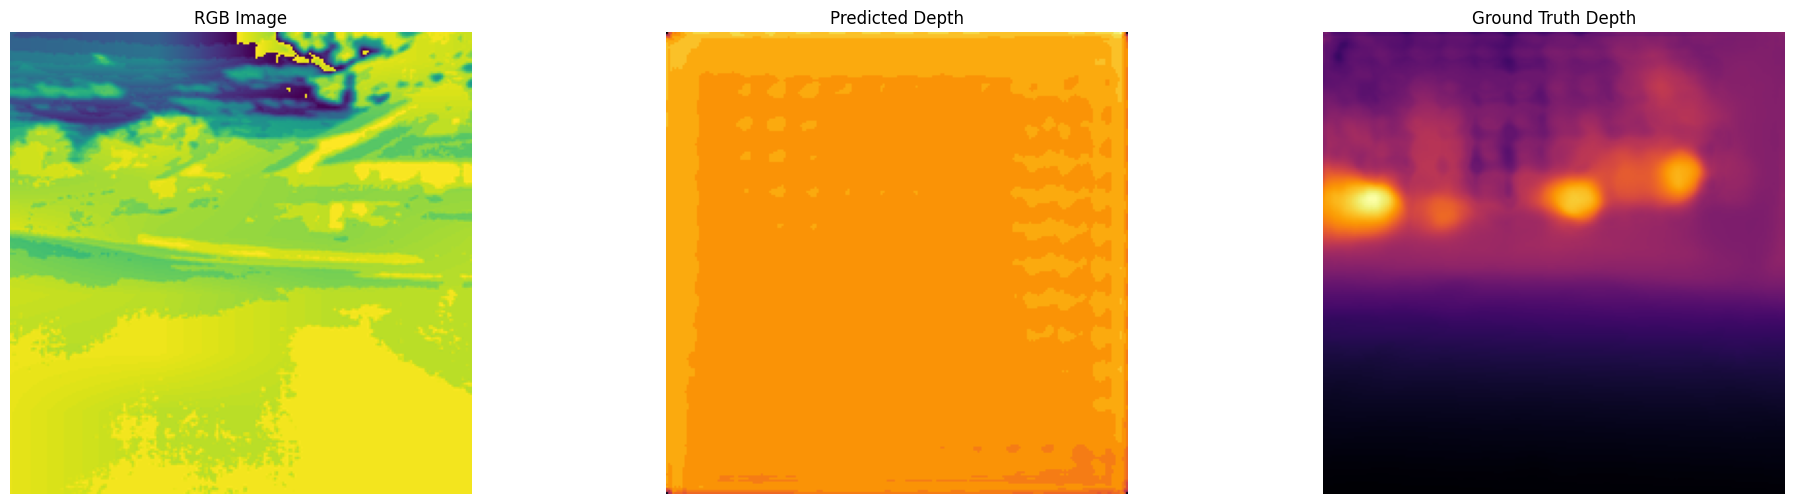

Processing sequence:  20%|██        | 1/5 [00:04<00:16,  4.23s/img]

>> Loading a list of 2 images
 - adding /home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/test/night/ImagesIR/fl_ir_aligned_1570731347_416317500_ir.png with resolution 1920x650 --> 224x224
 - adding /home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/test/night/ImagesIR/fl_ir_aligned_1570731347_416317500_ir.png with resolution 1920x650 --> 224x224
 (Found 2 images)
>> Inference with model on 2 image pairs


100%|██████████| 2/2 [00:03<00:00,  1.65s/it]


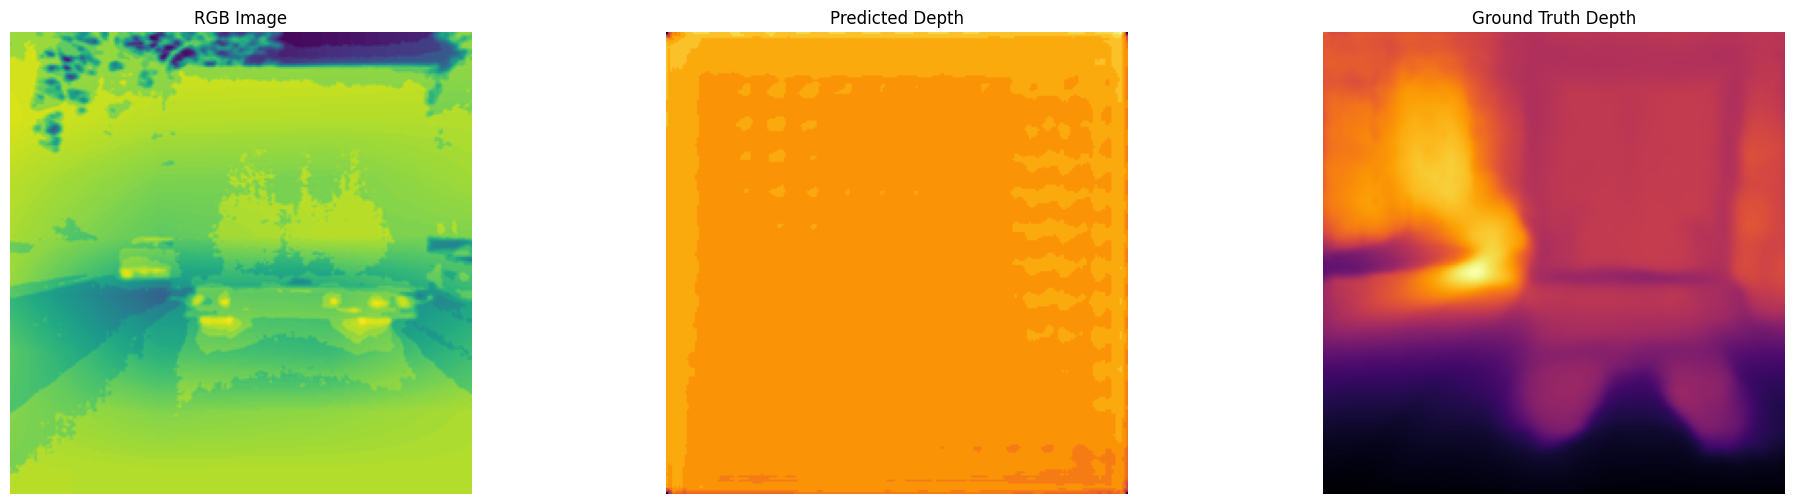

Processing sequence:  40%|████      | 2/5 [00:08<00:12,  4.18s/img]

>> Loading a list of 2 images
 - adding /home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/test/night/ImagesIR/fl_ir_aligned_1570731450_834533444_ir.png with resolution 1920x650 --> 224x224
 - adding /home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/test/night/ImagesIR/fl_ir_aligned_1570731450_834533444_ir.png with resolution 1920x650 --> 224x224
 (Found 2 images)
>> Inference with model on 2 image pairs


100%|██████████| 2/2 [00:03<00:00,  1.75s/it]


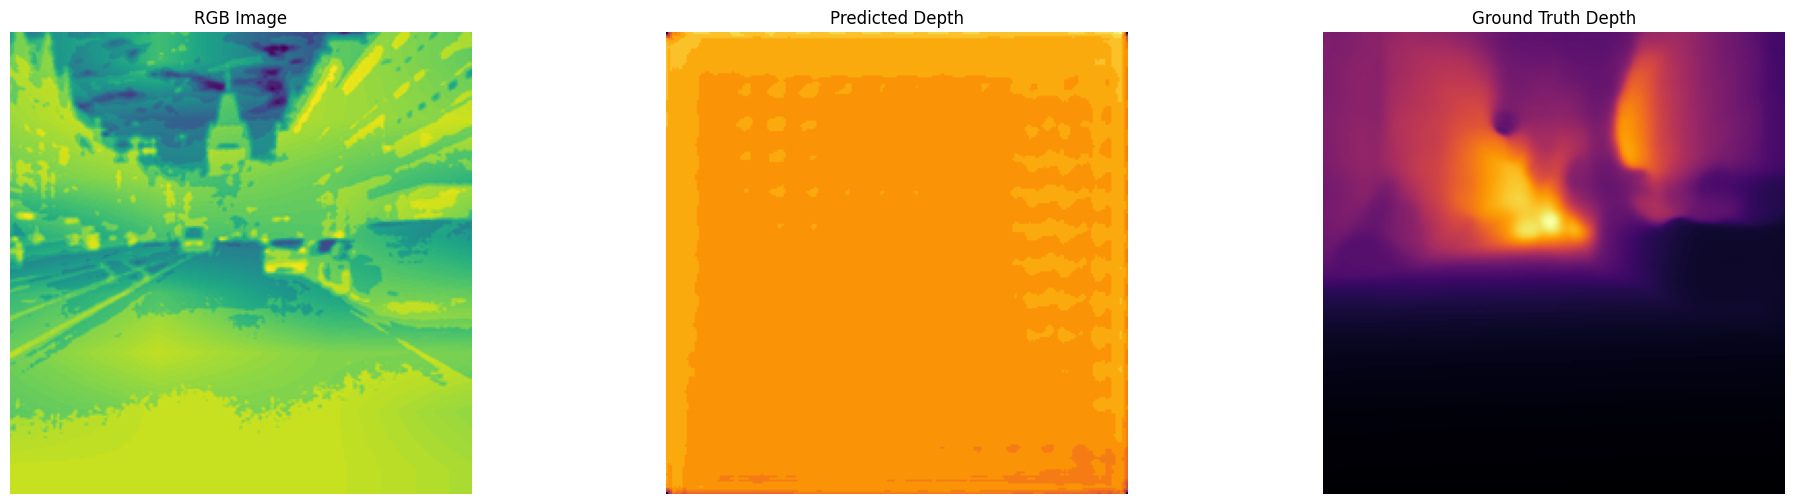

Processing sequence:  60%|██████    | 3/5 [00:12<00:08,  4.28s/img]

>> Loading a list of 2 images
 - adding /home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/test/night/ImagesIR/fl_ir_aligned_1570731538_795198524_ir.png with resolution 1920x650 --> 224x224
 - adding /home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/test/night/ImagesIR/fl_ir_aligned_1570731538_795198524_ir.png with resolution 1920x650 --> 224x224
 (Found 2 images)
>> Inference with model on 2 image pairs


100%|██████████| 2/2 [00:03<00:00,  1.64s/it]


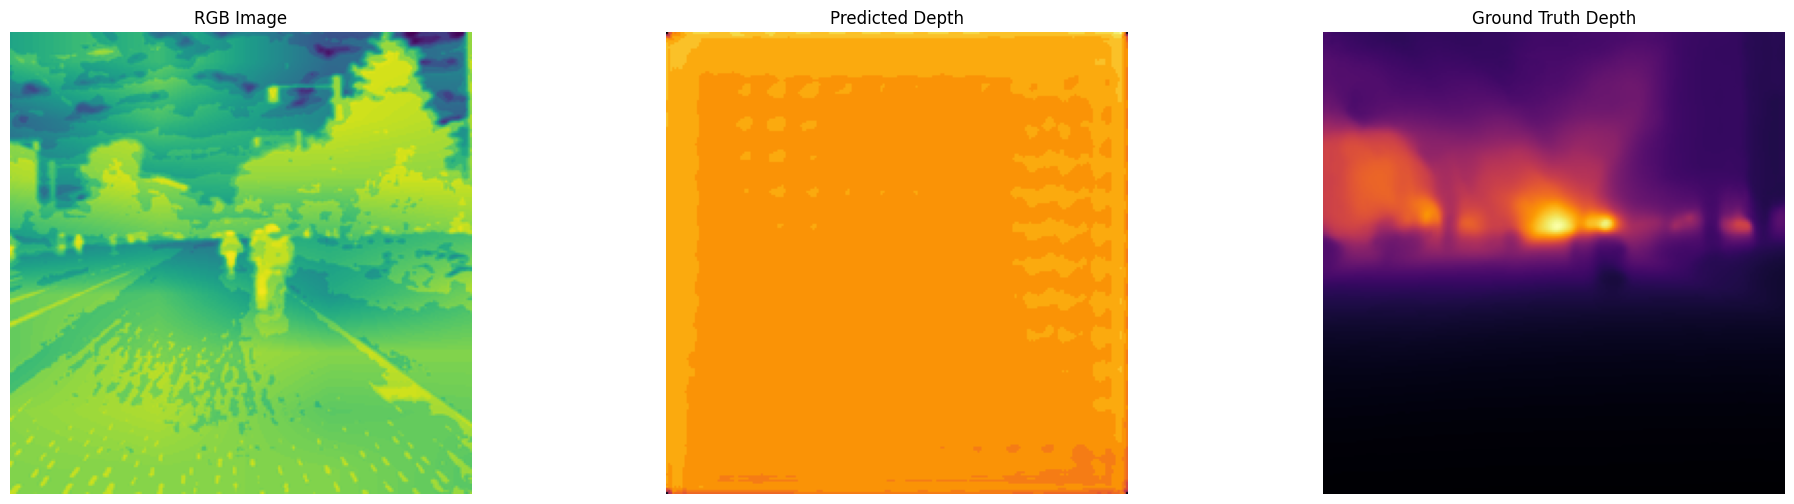

Processing sequence:  80%|████████  | 4/5 [00:16<00:04,  4.17s/img]

>> Loading a list of 2 images
 - adding /home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/test/night/ImagesIR/fl_ir_aligned_1570732261_694610636_ir.png with resolution 1920x650 --> 224x224
 - adding /home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/test/night/ImagesIR/fl_ir_aligned_1570732261_694610636_ir.png with resolution 1920x650 --> 224x224
 (Found 2 images)
>> Inference with model on 2 image pairs


100%|██████████| 2/2 [00:03<00:00,  1.61s/it]


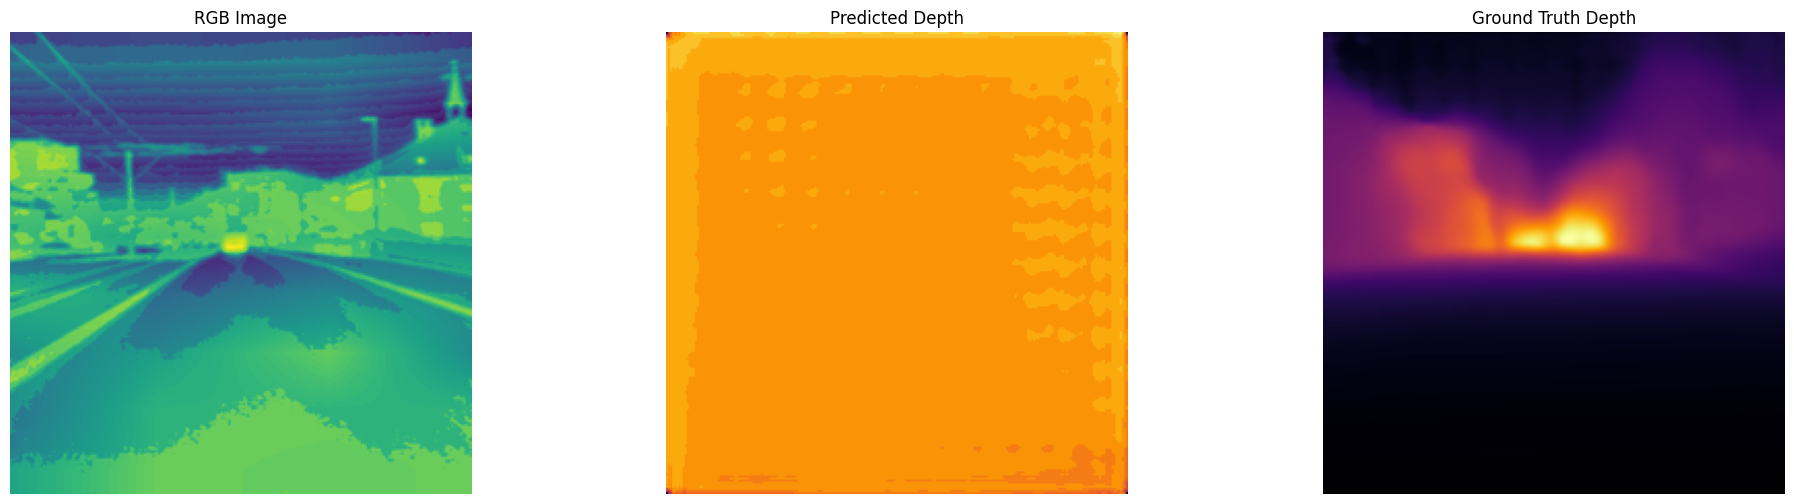

Processing sequence: 100%|██████████| 5/5 [00:20<00:00,  4.13s/img]


In [ ]:
from dust3r.inference import inference
from dust3r.model import AsymmetricCroCo3DStereo
from dust3r.utils.image import load_images,load_images_test
from dust3r.image_pairs import make_pairs
from dust3r.cloud_opt import global_aligner, GlobalAlignerMode
from dust3r.datasets.freiburgDataset import freiburgDataset 
import tqdm
import matplotlib.pyplot as plt
import numpy as np 


import torchvision.transforms as T
from PIL import Image
import torch

if __name__ == '__main__':
    # device = 'cuda'
    batch_size = 1
    schedule = 'cosine'
    lr = 0.01
    niter = 300

    # model_name = "naver/DUSt3R_ViTLarge_BaseDecoder_512_dpt"
    # you can put the path to a local checkpoint in model_name if needed
    model = AsymmetricCroCo3DStereo.from_pretrained("dust3r/checkpoints/dust3r_demo_1/checkpoint-best.pth", strict=False)
    # model = AsymmetricCroCo3DStereo.from_pretrained(model_name)
    # load_images can take a list of images or a directory
    test_dataset =freiburgDataset(ROOT='/home/user/elwakeely1/DataParam', split='Test', resolution=224, aug_crop=16,method = 'RANSAC')

    for i in tqdm.tqdm(range(5), desc="Processing sequence", unit="img"):
        view11,view21 = test_dataset[i]
        img_path = view11['instance']
        images = load_images_test([str(img_path),str(img_path)], size=224)
        pairs = make_pairs(images, scene_graph='complete', prefilter=None, symmetrize=True)
        output = inference(pairs,model, None, batch_size=batch_size)

        # at this stage, you have the raw dust3r predictions
        view12, pred1 = output['view1'], output['pred1']
        view22, pred2 = output['view2'], output['pred2']
        depth_pred = np.array(pred1['pts3d'][0][..., 2])

        img = view11["img"]
        if isinstance(img, torch.Tensor):
            img = img.cpu().detach().numpy()
        depth_gt = view11["depthmap"]
        img = view11["img"][0]
        img = img.cpu().detach().numpy()
        # img = img.permute(1, 2, 0).cpu().detach().numpy()
        # If values are in range [0, 1], scale to [0, 255]
        if img.max() <= 1.0:
            img = (img * 255).astype('uint8')
        if depth_pred.max() <= 1.0:
            depth_pred = (depth_pred * 255).astype('uint8')
        # Create a subplot with 1 row and 3 columns
        fig, ax = plt.subplots(1, 3, figsize=(24, 6))

        # Plot the RGB image (img)
        ax[0].imshow(img)  # For RGB, no cmap needed
        ax[0].axis('off')  # Hide axes for a cleaner view
        ax[0].set_title('RGB Image')

        # Plot the predicted depth map (depth_pred) with colormap 'turbo'
        ax[1].imshow(depth_pred, cmap='inferno')  # Apply colormap for depth
        ax[1].axis('off')  # Hide axes
        ax[1].set_title('Predicted Depth')

        # Plot the ground truth depth map (depth_gt) with colormap 'turbo'
        ax[2].imshow(depth_gt, cmap='inferno')  # Apply colormap for depth
        ax[2].axis('off')  # Hide axes
        ax[2].set_title('Ground Truth Depth')

        # Show the images
        plt.show()
